### Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from pandas import DatetimeIndex

%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_curve
from sklearn.metrics import f1_score
from sklearn.metrics import fbeta_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn import metrics

### Carregamento de Dados

In [2]:
dataOriginal = pd.read_csv('new_Global_Superstore_With_Outliers.csv', index_col=0, comment='#') 
df = dataOriginal 



# Modelação

## XGBoost

Para utilizarmos XGBoost, temos de converter os dados com "string" para numéricos. 
E removemos colunas que não consideramos importantes.

In [3]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV


dataset = df

X = dataset.drop(['Profit'],axis=1)
y = dataset['Profit']

small_dataset = False
if small_dataset: 
    remove_n = 20000
    drop_indices = np.random.choice(dataset.index, remove_n, replace=False)
    dataset_subset = dataset.drop(drop_indices)
    X = dataset_subset.drop('Profit', axis=1)
    y = dataset_subset[['Profit']]


In [4]:


RANDOM_SEED = 2021

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)



In [17]:
def analise_model(model,  graph=True, X_train_this=X_train, X_test_this=X_test, y_train_this=y_train, y_test_this=y_test): 
    start_time = time.time()
    model.fit(X_train_this, y_train_this)
    predictions = model.predict(X_test_this)
    print("time - {}".format(time.time()-start_time))
    #predictions  = predictions.reshape(len(predictions),1 )
    # Métricas
    if graph:
        print(model)
        print("Mean Absolute Error: ", mean_absolute_error(y_test_this, predictions))
        print("Mean Squared Error: ", mean_squared_error(y_test_this, predictions, squared=True))
    print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test_this, predictions)))
    if graph:
        sns.histplot(y_test_this-predictions, bins=10,stat="density")
        plt.show()
    
        sns.displot(y_test_this-predictions)
        plt.show() 
        ax = plt.axes()
        ax.plot([-2000, -250, 0, 1500, 3000], [-2000, -250, 0, 1500, 3000], 'r')
        plt.scatter(y_test_this,predictions)
        plt.show()
    return predictions
    



time - 9.150588750839233
XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)
Mean Absolute Error:  34.74843758316463
Mean Squared Error:  8292.353555772377
RMSE:  91.06236080715443


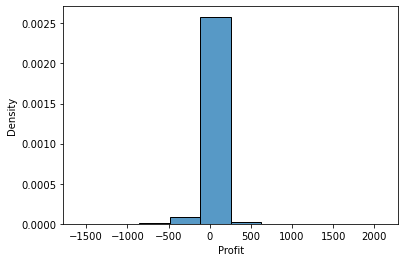

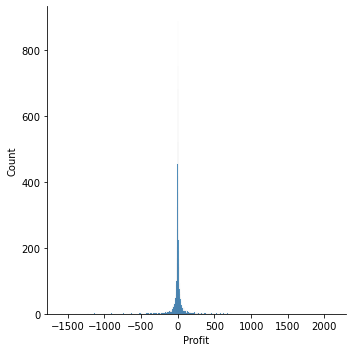

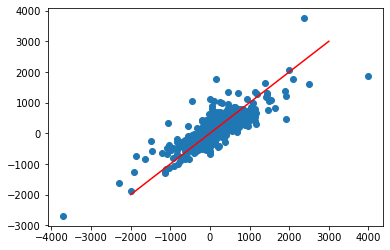

array([ 52.198288,  30.603205,   5.322511, ...,  11.517274,  88.53084 ,
       -25.332373], dtype=float32)

In [6]:


xgbModel = xgb.XGBRegressor()

analise_model(xgbModel)



In [7]:

def hyper_param(model, params):
    print("Modelo atual: " , model)
    
    # cv = cross-validation generator
    # verbose = quanto é apresentado
    tuning_model=GridSearchCV(model,param_grid=params,scoring='neg_mean_squared_error',cv=3)
    tuning_model.fit(X_train, y_train)
    
    return tuning_model.best_params_
    

Modelo atual:  XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)
Melhores parâmetros:  {'learning_rate': 0.3, 'max_depth': 2, 'n_estimators': 120}
XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             en

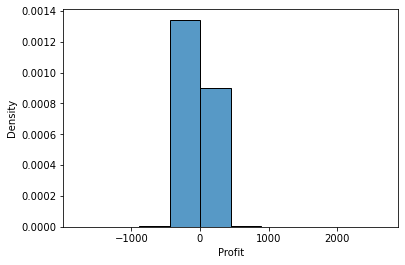

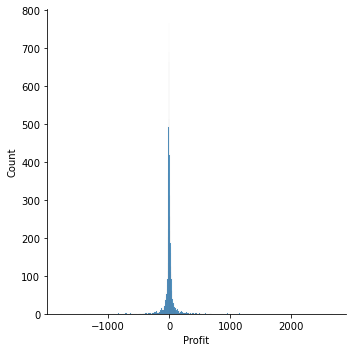

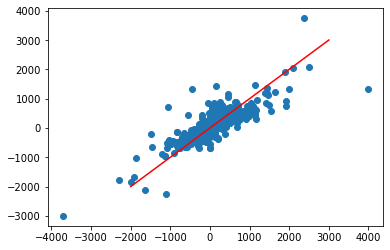

In [12]:
parameters = {
    'max_depth': [2,4,6],
    'n_estimators': [80,100,120],
    'learning_rate': [0.01, 0.1, 0.3]
}

''' Parámetros default, para comparar
{
'objective': 'reg:squarederror', 'base_score': 0.5, 'booster': 'gbtree', 'callbacks': None, 'colsample_bylevel': 1, 
'colsample_bynode': 1, 'colsample_bytree': 1, 'early_stopping_rounds': None, 'enable_categorical': False, 
'eval_metric': None, 'feature_types': None, 'gamma': 0, 'gpu_id': -1, 'grow_policy': 'depthwise', 
'importance_type': None, 'interaction_constraints': '', 
'learning_rate': 0.300000012, 

'max_bin': 256, 'max_cat_threshold': 64, 'max_cat_to_onehot': 4, 'max_delta_step': 0, 

'max_depth': 6, 

'max_leaves': 0, 'min_child_weight': 1, 'missing': nan, 'monotone_constraints': '()', 

'n_estimators': 100, 

'n_jobs': 0, 'num_parallel_tree': 1, 'predictor': 'auto', 'random_state': 0, 'reg_alpha': 0, 'reg_lambda': 1, 
'sampling_method': 'uniform', 'scale_pos_weight': 1, 'subsample': 1, 'tree_method': 'exact', 'validate_parameters': 1, 
'verbosity': None}
'''


best_param1 = hyper_param(xgbModel, parameters)

best_XGB = xgb.XGBRegressor(random_state=RANDOM_SEED)
print("Melhores parâmetros: ", best_param1)
print(best_XGB.set_params(**best_param1))
predictions = analise_model(best_XGB)

# Importância das features



In [13]:
from sklearn.feature_selection import RFE

for num_cols in range(5,23):
    print("Analise num cols: " , num_cols)
    rfe = RFE(best_XGB, n_features_to_select=num_cols)
    analise_model(rfe, False)

best_num_cols = 20


Analise num cols:  5
time - 39.74572563171387
RMSE:  92.40419263616876
Analise num cols:  6
time - 34.076416015625
RMSE:  93.41466702021424
Analise num cols:  7
time - 30.27528166770935
RMSE:  92.47878957537846
Analise num cols:  8
time - 21.40565299987793
RMSE:  92.21426737297526
Analise num cols:  9
time - 20.13286852836609
RMSE:  91.97666600086227
Analise num cols:  10
time - 18.935193061828613
RMSE:  91.20913979741609
Analise num cols:  11
time - 17.24923038482666
RMSE:  92.29991596349832
Analise num cols:  12
time - 15.655853509902954
RMSE:  93.15953300583615
Analise num cols:  13
time - 15.527931213378906
RMSE:  93.30195026806354
Analise num cols:  14
time - 13.045831680297852
RMSE:  92.77553244258613
Analise num cols:  15
time - 12.82042384147644
RMSE:  92.77553244258613
Analise num cols:  16
time - 11.537693500518799
RMSE:  92.77553244258613
Analise num cols:  17
time - 9.683753728866577
RMSE:  92.77553244258613
Analise num cols:  18
time - 8.808676719665527
RMSE:  92.775532442

In [14]:
from operator import itemgetter


best_num_cols = 9

rfe = RFE(best_XGB, n_features_to_select=best_num_cols)
analise_model(rfe, False)

features = X_train.columns.to_list()
for x, y in (sorted(zip(rfe.ranking_ , features), key=itemgetter(0))):
    print(x, y)

time - 19.5446035861969
RMSE:  91.97666600086227
1 Segment
1 City
1 State
1 Sub-Category
1 Sales
1 Quantity
1 Discount
1 order_month
1 ship_day
2 Country
3 pib_country
4 Shipping Cost
5 Category
6 order_day
7 Region
8 Ship Mode
9 discount_bracket
10 Order Priority
11 order_year
12 ship_year
13 ship_month
14 ship_mode_binned
15 Market_binned


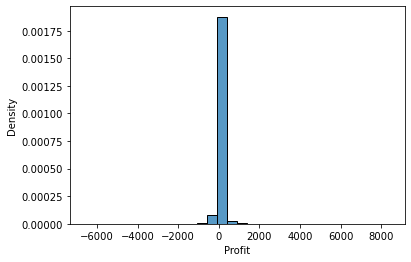

Quartis
[-6599.978      0.         9.2551    36.8415  8399.976 ]


In [15]:
sns.histplot(dataset['Profit'], bins=30,stat="density")
plt.show()
    
print("Quartis")
x = np.quantile(dataset['Profit'], [0,0.25,0.5,0.75,1])

print(x)
#plt.scatter(y_test,predictions)
#plt.show()

# Análise sem outliers

time - 0.8868551254272461
XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.3, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=2, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=120, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=2021, ...)
Mean Absolute Error:  13.25666005674608
Mean Squared Error:  527.8611840138554
RMSE:  22.975229792405894


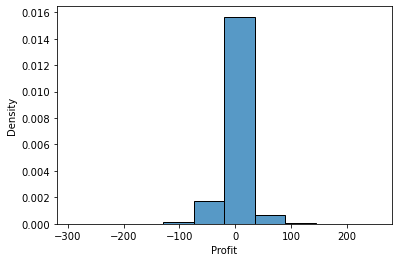

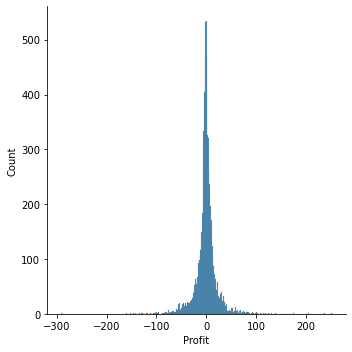

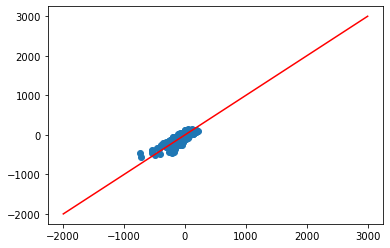

In [22]:
dataNoOutliers = pd.read_csv('new_Global_Superstore_Without_Outliers.csv', index_col=0, comment='#') 
df = dataNoOutliers 


X_no_outliers = df.drop(['Profit'],axis=1)
y_no_outliers = df['Profit']


X_train, X_test, y_train, y_test = train_test_split(X_no_outliers, y_no_outliers, test_size=0.2, random_state=RANDOM_SEED)
#def analise_model(model,  graph=True, X_train_this=X_train, X_test_this=X_test, y_train_this=y_train, y_test_this=y_test): 

predictions = analise_model(best_XGB, True, X_train, X_test, y_train, y_test)

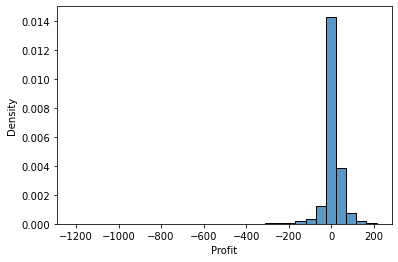

Quartis
[-1.218384e+03 -4.882500e-01  6.360000e+00  1.987200e+01  2.131200e+02]


In [24]:
sns.histplot(dataNoOutliers['Profit'], bins=30,stat="density")
plt.show()
    
print("Quartis")
x = np.quantile(dataNoOutliers['Profit'], [0,0.25,0.5,0.75,1])

print(x)